<a href="https://colab.research.google.com/github/ritwikraha/computer-needs-glasses/blob/master/image-multimodal-models/llava_gemma_2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 1s (153 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 123623 

In [2]:
!pip install -q pdf2image transformers

In [3]:
import requests

from PIL import Image
from transformers import AutoProcessor, AutoTokenizer, LlavaForConditionalGeneration

In [4]:
from google.colab import files
from pdf2image import convert_from_path
from huggingface_hub import notebook_login

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  images = convert_from_path(fn)

Saving kids-01.pdf to kids-01.pdf
User uploaded file "kids-01.pdf" with length 1045721 bytes


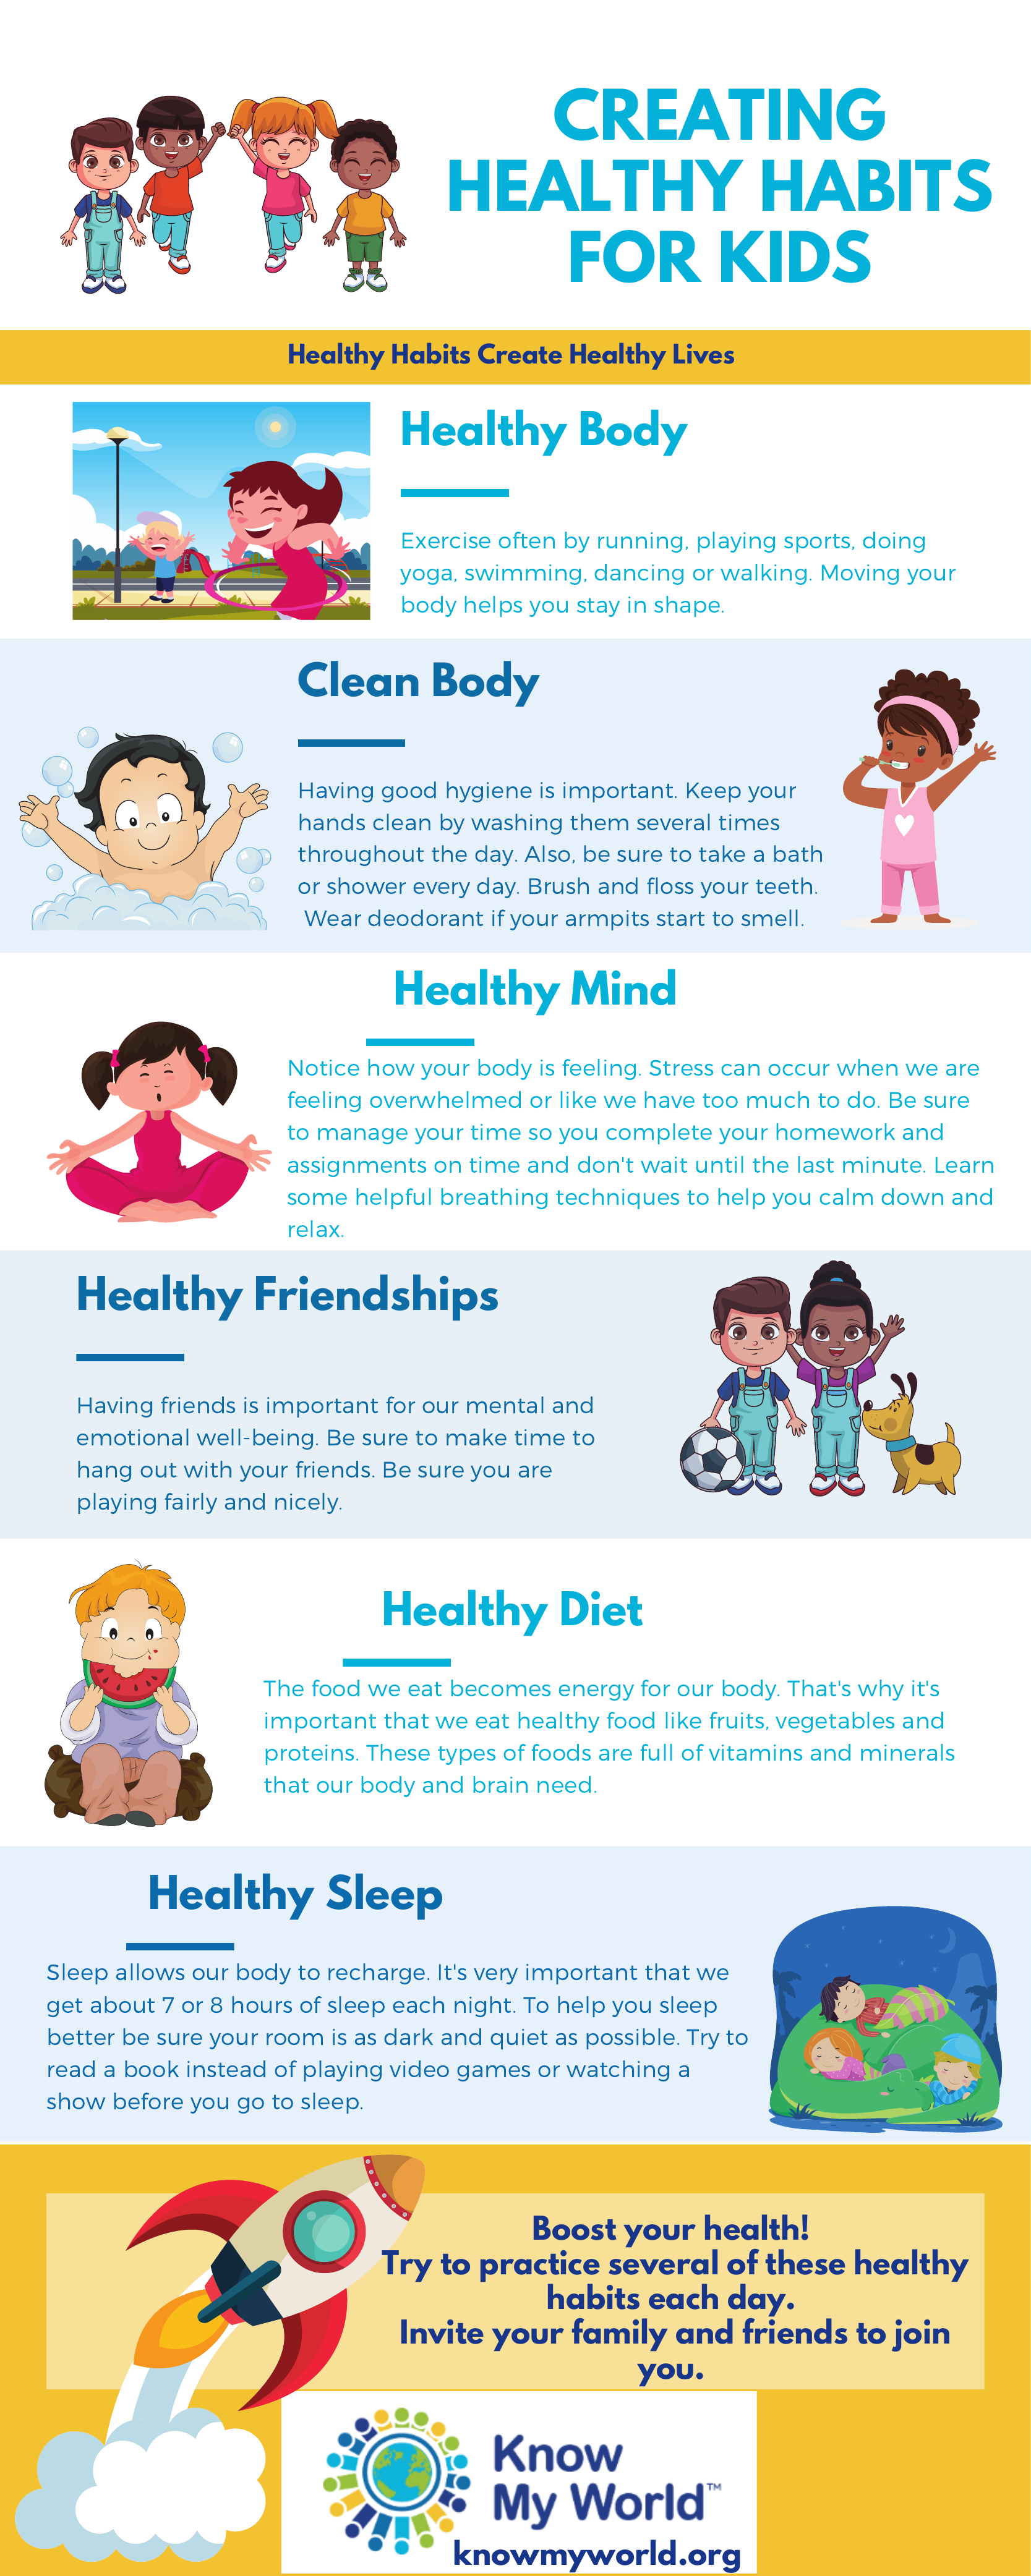

In [5]:
images[0]

In [6]:
import requests
from PIL import Image
from transformers import (
  LlavaForConditionalGeneration,
  AutoTokenizer,
  AutoProcessor,
  CLIPImageProcessor
)

In [7]:

#In this repo, needed for version < 4.41.1
#from processing_llavagemma import LlavaGemmaProcessor
#processor = LlavaGemmaProcessor( tokenizer=AutoTokenizer.from_pretrained(checkpoint), image_processor=CLIPImageProcessor.from_pretrained(checkpoint))

checkpoint = "Intel/llava-gemma-2b"

# Load model
model = LlavaForConditionalGeneration.from_pretrained(checkpoint)
processor = AutoProcessor.from_pretrained(checkpoint)

# Prepare inputs
# Use gemma chat template
prompt = processor.tokenizer.apply_chat_template(
    [{'role': 'user', 'content': "<image>\nWhat's the content of the image?"}],
    tokenize=False,
    add_generation_prompt=True
)
# url = "https://www.ilankelman.org/stopsigns/australia.jpg"
# image = Image.open(requests.get(url, stream=True).raw)
image = images[0]
inputs = processor(text=prompt, images=image, return_tensors="pt")

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/57.8k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/1.30G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/819 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.38k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

In [10]:
# Generate
generate_ids = model.generate(**inputs, max_length=200)
output = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]
print(output)

user

What's the content of the image?
model
The image is a collage of four pictures, each featuring a different aspect of healthy living. The pictures are arranged in a way that they form a single image, with each picture being a separate image.

In the first picture, there is a person holding a toothbrush, emphasizing the importance of oral hygiene. In the second picture, a person is seen smiling, suggesting a positive attitude towards health and well-being. The third picture features a person sitting on a bench, possibly enjoying a healthy snack or meal. The fourth picture shows a person holding a sports ball, symbolizing the importance of physical activity and exercise for overall health.

The collage is visually appealing and serves as a reminder of the importance of maintaining a healthy lifestyle.

The collage is presented in a way that it can be easily understood by people of all ages, making it an effective way to convey the message of healthy
